In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [111]:
data = pd.read_csv('./data/obesity_train.csv')
print(data.head())

   ID  Age  Gender  Height  Weight   BMI          Label
0   1   25    Male     175      80  25.3  Normal Weight
1   2   30  Female     160      60  22.5  Normal Weight
2   3   35    Male     180      90  27.3     Overweight
3   4   40  Female     150      50  20.0    Underweight
4   5   45    Male     190     100  31.2          Obese


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [113]:
data.describe()

,ID,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,56.046296,46.555556,166.574074,59.490741,20.549074
std,31.917939,24.720620,27.873615,28.856233,7.583818
min,1.000000,11.000000,120.000000,10.000000,3.900000
25%,28.750000,27.000000,140.000000,35.000000,16.700000
50%,56.500000,42.500000,175.000000,55.000000,21.200000
75%,83.250000,59.250000,190.000000,85.000000,26.100000
max,110.000000,112.000000,210.000000,120.000000,37.200000


In [114]:
data.isnull().any()

ID        False
Age       False
Gender    False
Height    False
Weight    False
BMI       False
Label     False
dtype: bool

In [115]:
duplicate_mask = data.duplicated()
duplicates = data[duplicate_mask]
print(duplicates)

Empty DataFrame
Columns: [ID, Age, Gender, Height, Weight, BMI, Label]
Index: []


In [116]:
data.columns.tolist()

['ID', 'Age', 'Gender', 'Height', 'Weight', 'BMI', 'Label']

In [117]:
data.drop(columns= 'Gender')

,ID,Age,Height,Weight,BMI,Label
0,1,25,175,80,25.3,Normal Weight
1,2,30,160,60,22.5,Normal Weight
2,3,35,180,90,27.3,Overweight
3,4,40,150,50,20.0,Underweight
4,5,45,190,100,31.2,Obese
...,...,...,...,...,...,...
103,106,11,175,10,3.9,Underweight
104,107,16,160,10,3.9,Underweight
105,108,21,180,15,5.6,Underweight
106,109,26,150,15,5.6,Underweight


In [118]:
data.drop(columns= 'Label')

,ID,Age,Gender,Height,Weight,BMI
0,1,25,Male,175,80,25.3
1,2,30,Female,160,60,22.5
2,3,35,Male,180,90,27.3
3,4,40,Female,150,50,20.0
4,5,45,Male,190,100,31.2
...,...,...,...,...,...,...
103,106,11,Male,175,10,3.9
104,107,16,Female,160,10,3.9
105,108,21,Male,180,15,5.6
106,109,26,Female,150,15,5.6


In [119]:
data = data[['Height', 'Weight', 'BMI']]

In [120]:
print(data.head())

   Height  Weight   BMI
0     175      80  25.3
1     160      60  22.5
2     180      90  27.3
3     150      50  20.0
4     190     100  31.2


In [121]:
# data['Label'] = data['Label'].apply(lambda x: 1 if x == 'Underweight' 
#                                     else 2 if x == 'Normal Weight' 
#                                     else 3 if x == 'Overweight' 
#                                     else 4)


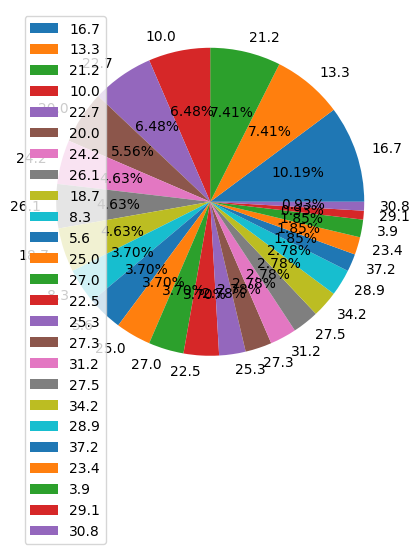

In [122]:
tdf= data['BMI'].value_counts().reset_index()
plt.figure(figsize=(15,5))
plt.pie(x=tdf['count'],labels=tdf['BMI'],autopct='%.2f%%')
plt.legend(tdf['BMI'])
plt.show()

In [123]:
# Define input (X) and output (y)
X = data[['Height', 'Weight']]
y = data['BMI']

In [124]:
X

,Height,Weight
0,175,80
1,160,60
2,180,90
3,150,50
4,190,100
...,...,...
103,175,10
104,160,10
105,180,15
106,150,15


In [125]:
y

0      25.3
1      22.5
2      27.3
3      20.0
4      31.2
       ... 
103     3.9
104     3.9
105     5.6
106     5.6
107     8.3
Name: BMI, Length: 108, dtype: float64

In [126]:
X.shape

(108, 2)

In [127]:
y.shape

(108,)

In [128]:
X = np.array(X)
y = np.array(y)

In [129]:
X.shape

(108, 2)

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
X_train.shape

(86, 2)

In [132]:
X_test.shape

(22, 2)

In [133]:
print(X)

[[175  80]
 [160  60]
 [180  90]
 [150  50]
 [190 100]
 [140  40]
 [200 110]
 [130  30]
 [210 120]
 [120  20]
 [175  70]
 [160  50]
 [180  80]
 [150  60]
 [190  90]
 [140  50]
 [200 100]
 [130  40]
 [210 110]
 [120  30]
 [175  80]
 [160  60]
 [180  90]
 [150  50]
 [190 100]
 [140  40]
 [200 110]
 [130  30]
 [210 120]
 [175  75]
 [160  55]
 [180  85]
 [190  95]
 [140  75]
 [200 105]
 [130  85]
 [210 115]
 [120  95]
 [175  65]
 [160  45]
 [180  75]
 [150  55]
 [190  85]
 [140  65]
 [200  95]
 [130  75]
 [210 105]
 [120  85]
 [175  65]
 [160  45]
 [180  75]
 [150  55]
 [190  85]
 [140  65]
 [200  95]
 [130  75]
 [210 105]
 [120  85]
 [175  55]
 [160  35]
 [180  65]
 [150  45]
 [190  75]
 [140  55]
 [200  85]
 [130  65]
 [210  95]
 [120  75]
 [175  45]
 [160  30]
 [180  55]
 [150  40]
 [190  65]
 [140  50]
 [200  75]
 [130  60]
 [210  85]
 [120  70]
 [175  35]
 [160  25]
 [180  45]
 [150  30]
 [190  55]
 [175  25]
 [160  20]
 [180  30]
 [150  25]
 [190  40]
 [140  35]
 [200  50]
 [130  40]

In [134]:
X_train

array([[200,  85],
       [200, 110],
       [180,  90],
       [180,  85],
       [120,  85],
       [130,  30],
       [140,  50],
       [200,  95],
       [140,  35],
       [200,  50],
       [120,  20],
       [140,  75],
       [130,  75],
       [175,  10],
       [210, 120],
       [180,  75],
       [140,  40],
       [140,  65],
       [190,  20],
       [160,  45],
       [130,  85],
       [200, 100],
       [175,  35],
       [200, 105],
       [210,  95],
       [130,  30],
       [140,  65],
       [130,  65],
       [190,  65],
       [130,  30],
       [120,  30],
       [130,  40],
       [180,  15],
       [140,  40],
       [175,  45],
       [160,  45],
       [150,  60],
       [190, 100],
       [150,  50],
       [130,  40],
       [175,  65],
       [210, 120],
       [160,  20],
       [200, 110],
       [180,  55],
       [160,  15],
       [200,  30],
       [200,  95],
       [180,  75],
       [140,  50],
       [210, 105],
       [190,  25],
       [150,

In [135]:
model = LinearRegression(fit_intercept = True)
model.fit(X_train, y_train)


LinearRegression()

In [136]:
y_pred = model.predict(X_test)

In [137]:
# Checking the accuracy
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
mse

np.float64(2.6194358646682967)

In [138]:
print('Linear Model Coefficient (m): ', model.coef_)
print('Linear Model Coefficient (b): ', model.intercept_)

Linear Model Coefficient (m):  [-0.01916037  0.2648144 ]
Linear Model Coefficient (b):  8.102058955877514


In [139]:
y_pred

array([24.33982171, 23.28600111, 30.94302737, 11.36935329, 24.32266747,
       25.66389369, 19.60119079, 25.47228995,  9.94947944, 18.27711881,
       13.17243464, 11.65675891, 25.93414507, 16.56983934, 33.20796383,
       12.98083089, 31.88389185, 26.58760393,  9.2002187 , 26.97081143,
       25.83834319, 34.53203581])

In [140]:
# # Misalkan y_predict adalah numpy array
# y_predict = np.array([1, 2, 3, 4])  #

# # Mapping angka kembali ke label
# mapping = {1: 'Underweight', 2: 'Normal Weight', 3: 'Overweight', 4: 'Obese'}

# # Mengonversi array angka menjadi label asli menggunakan list comprehension
# y_predict_labels = [mapping.get(x, 'Unknown') for x in y_predict]

# print(y_predict_labels)

In [141]:
import joblib

joblib.dump(model, './data/obesity_train.pkl')

['./data/obesity_train.pkl']

In [144]:
regressor = joblib.load('model/obesity_train.pkl')

input_data = np.array([[145, 45]])
predicted_bmi = regressor.predict(input_data)
print(predicted_bmi)


[1.47756453]
